## Microsoft Movie Project


**Author:** Wallace Ouma
***
## 1. Business Understanding
**a. Overview**

This study sought to guide Microsoft's possible foray into original video content by studying current patterns in box office success. By using descriptive statistics and analyzing several online movie databases, we have identified three key areas that provide unique opportunities for recommendations: establishing strategic partnerships, improving content selection, and optimizing talent acquisition and recruiting.

**b. Business Problem**

Microsoft's new film studio, lacking competence in filmmaking, needs guidance about the most advantageous film genres for achieving maximum box office success. This investigation seeks to affect the studio's film choices by analyzing past box office statistics and examining genre patterns. Key metrics such as box office sales, return on investment (ROI), and ratings will assess the financial feasibility and audience response across various film genres.

The effectiveness of this analysis will be measured using the following criteria:
* The investigation must accurately determine the film genres that have consistently succeeded in box office performance.
* The objective is to predict the potential increase in revenue for a movie by analyzing various aspects of the dataset. We define profitability as generating box office revenue that is at least 2.5 times the movie's budget.

**c. Reasearch Objectives**

The purpose of this research is to examine historical film data in order to identify similar features among top-performing movies. The results will help with choosing the right genres of movies to increase the likelihood of success.

    Specific Objectives:

* To determine which genres have the most chance of being financially successful and critically acclaimed.
* To evaluate the impact of supplementary aspects on a film's profitability, look at things like the budget, the studio, and the demographics of the intended fans.
* To draw conclusions and provide suggestions based on the study to match the studio's content strategy with what the public wants and what the market is doing, so they have a better chance of making financially successful films.

**d. Methods**

To unravel the secrets of box office success, we employ descriptive statistics. This allows us to delve into the performance metrics of top studios, genres, directors, and writers. The goal is to extract actionable insights that can guide Microsoft Studios in its venture into the world of filmmaking.

## 2. Data Understanding

The data used in the project was obtained from [IMDB](https://www.imdb.com/), [The Numbers](https://www.the-numbers.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), and [Minneapolis Fed](https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1800-). The data was joined using movie names as well as with the help of unique ids for movies and crew.

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import sqlite3 
import requests

%matplotlib inline 

In [2]:
# Reading the CSV Files USED
budgets_df = pd.read_csv("Dataset/tn.movie_budgets.csv") #USED

#Reading datasets NOT USED

bom = pd.read_csv ("Dataset/bom.movie_gross.csv") #
tmdb_movies = pd.read_csv ("Dataset/tmdb.movies.CSV", index_col= 0) #Reading the Movies Database
#Reading Rotten Tomatoes
rt_reviews = pd.read_csv("Dataset/rt.reviews.tsv", sep = "\t", encoding= 'unicode_escape')
rt_movie = pd.read_csv("Dataset/rt.movie_info.tsv", sep ="\t")
#Establishing Connection to the Database
conn = sqlite3.connect ("Dataset/im.db")


Extracting `im.db` zipped file

In [3]:
import zipfile
import os

zip_file_path = 'Dataset/im.zip'
extracted_folder = 'data'

# Check if the file is already extracted
extracted_file_path = os.path.join(extracted_folder, 'im.db')
if os.path.isfile(extracted_file_path):
    print("File already extracted.")
else:
    # Extract the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extract('im.db', extracted_folder)

    print("File successfully extracted.")

File already extracted.


Loading and Reading the Database tables

In [4]:
conn = sqlite3.connect("data/im.db")

# Retreiving relevant tables from the imdb database
movie_basics = pd.read_sql(""" SELECT * FROM movie_basics """, conn)
persons = pd.read_sql(""" SELECT * FROM persons """, conn)
principals = pd.read_sql(""" SELECT * FROM principals """, conn)

**Checking the Movies Budget Dataset**

In [5]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**Areas of Focus**

This notebook is dedicated to exploring three key aspects of the movie industry, each with its own dedicated section. The focus areas include:

1. **Cast & Crew:** Prioritizing specific professions within the industry.
2. **Advertising:** Identifying priority areas for investment.
3. **Genre:** Analyzing genres to determine which ones are riskier and which ones are safer bets.

**Measures of Success**

To assess a movie's success, two custom metrics are employed, providing a unique perspective:

1. **ROI (Return on Investment):**
   - Calculated as the overall gross of a movie divided by its budget.
   - Break-even point at ROI = 100%, indicating the movie recouped its costs.
   - A movie is deemed profitable if ROI > 100%, and unprofitable if ROI < 100%.
   - Example: An ROI of 450% implies the movie generated 4.5 times its initial investment.

2. **Profitable (Boolean Variable):**
   - Equates to True (1) if ROI > 100%.
   - Equates to False (0) if ROI <= 100%.

These metrics extend beyond evaluating movies and can be applied to assess an individual's success in the movie industry.

**Additional Metrics for Individual Evaluation**

1. **Average ROI:**
   - Represents the average ROI of all movies an individual has participated in.
   - Example: An average ROI of 258% indicates that, on average, the movies they are involved in have earned 2.58 times their budget.

2. **Hitrate:**
   - Denotes the average value of the Profitable boolean across all movies an individual has participated in.
   - Example: A hitrate of 67% implies that 67% of the movies they're involved in have been profitable.

**budgets_df.df – Data Selection**

In this analysis, the primary focus is leveraging the extensive budget data available in the thenumbers dataset, surpassing others in data points. This dataset was the only one to be analyzed to maximize the amount of data for a thorough analysis of the film business. By focusing on the numbers dataset, we expect to get a more comprehensive and nuanced knowledge of many sector aspects, which aligns with our objective of delivering a complete and wise study.

In [6]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
#Renaming some columns to simpler names
budgets_df.rename(columns={'production_budget': 'budget', 'release_date': 'date'}, inplace=True)

In [8]:
budgets_df.head (1) #Checking if the change was made

,id,date,movie,budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


**budgets_df – Data Preparation & Cleaning**

Upon reviewing the presented data, it is evident that there are no null values, signifying a positive attribute. Nevertheless, certain procedures must be followed to guarantee that the data is adequately ready for analysis. Key columns like production budget, domestic gross, worldwide gross, and release date must be reformatted into integer numbers promptly. Return on investment (ROI), profitability, worldwide gross, and ROI tier columns must also be defined. To improve the accuracy of the analysis and reduce the possibility of making ill-informed conclusions, removing outliers from the dataset is crucial.

`Converting data columns to integer types`

In [9]:
def money_to_int(x):
    """
    This function turns a money-formatted string with commas
    into an integer.
    """
    if not x:
        return None  # Return None for empty values
    
    x = str(x)[1:]  # Convert to string and eliminate the dollar sign
    
    # Removing the commas
    split = x.split(",")
    joined = "".join(split)
    
    try:
        # Turns the resulting string into an integer
        integer = int(joined)
        return integer
    except ValueError:
        return None  # Return None for non-numeric values

# Using the function to re-format specific columns
columns_to_convert = ['budget', 'domestic_gross', 'worldwide_gross']  # Replace with actual column names

for column in columns_to_convert:
    budgets_df[column] = budgets_df[column].map(lambda x: money_to_int(x))

# If you need to re-format the date column
budgets_df['date'] = budgets_df['date'].map(lambda x: int(str(x)[-4:]))


Creating ROI, foreign gross, and profitable columns

In [10]:
# Assuming budgets_df is the name of your dataset
budgets_df['ROI'] = budgets_df['worldwide_gross'] / budgets_df['budget']
budgets_df['ROI'] = budgets_df['ROI'].apply(lambda x: round(x * 100, 2) if not pd.isna(x) else None)

budgets_df['foreign_gross'] = budgets_df['worldwide_gross'] - budgets_df['domestic_gross']
budgets_df['profitable'] = budgets_df['ROI'].map(lambda x: True if x and x > 100 else False)


Checking the spread of the data

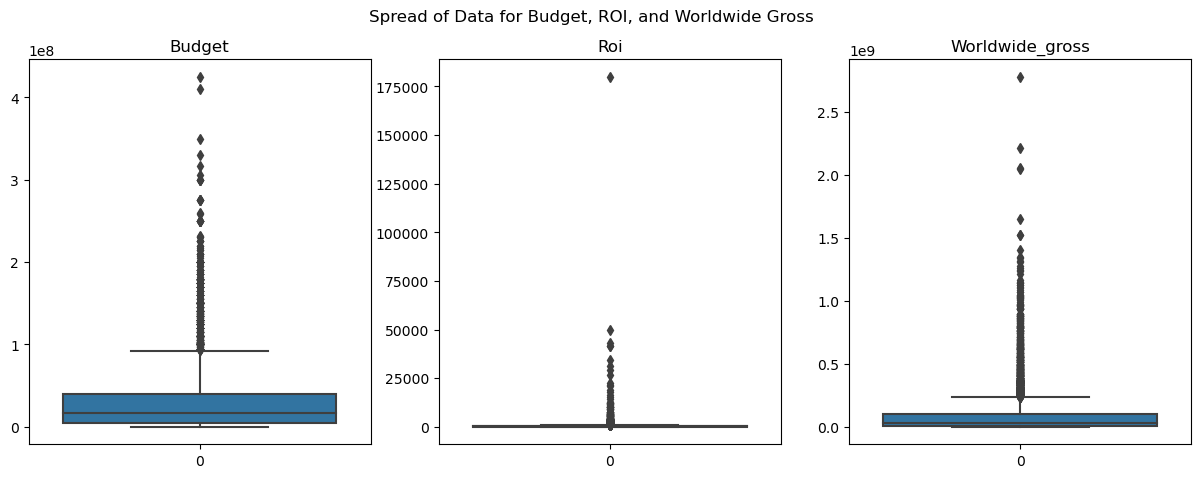

In [11]:

columns_to_plot = ['budget', 'ROI', 'worldwide_gross']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    sns.boxplot(budgets_df[column], ax=ax[i])
    ax[i].set_title(column.capitalize())  # Capitalize the column name for better readability

plt.suptitle('Spread of Data for Budget, ROI, and Worldwide Gross')
plt.show()


Removing Outliers in budget, ROI, and worldwide gross columns

In [12]:
def is_outlier(x, df):
    """
    This function takes a value and its associated
    group of values as its arguments. It determines whether
    or not the value is an outlier in its dataset; if it is,
    it returns a null value. If not, it returns the original value.
    """

    q1, q3 = df.quantile([.25, .75])
    iqr = q3 - q1
    
    lower_limit = q1 - (iqr * 1.5)
    upper_limit = q3 + (iqr * 1.5)
    
    if any([(x < lower_limit), (x > upper_limit)]):
        return np.nan
    else:
        return x

# Number of rows pre-cleaning
print("The previous dataframe had {} rows.\n".format(budgets_df.shape[0]))

to_clean = ['budget', 'ROI', 'worldwide_gross']

for column in to_clean:
    budgets_df[column] = budgets_df[column].map(lambda x: is_outlier(x, budgets_df[column]))

# This shows us how many 'outliers' are in each column. 
for column in to_clean:
    print(budgets_df[column].isnull().value_counts())

budgets_df.dropna(inplace=True)

# Resetting the index
budgets_df = budgets_df.reset_index(drop=True)

# Number of rows post-cleaning
print("\nThe current dataframe has {} rows.".format(budgets_df.shape[0]))


The previous dataframe had 5782 rows.

budget
False    5351
True      431
Name: count, dtype: int64
ROI
False    5287
True      495
Name: count, dtype: int64
worldwide_gross
False    5178
True      604
Name: count, dtype: int64

The current dataframe has 4695 rows.


**Creating the ROI-tier column**

This column will help in classifying the movie based on it ROI

In [13]:
# The number of bins we split ROI into
num_bins = 15

# Creating the endpoints for our ranges
ROI_range = np.linspace(0, 1000, num_bins, dtype=int)

# Creating neatly formatted strings for our ranges
ROIstrings = [f"{round(i, 1)} percent" for i in ROI_range]
ROIranges = [f"{ROIstrings[i]} – {ROIstrings[i+1]}" for i in range(len(ROIstrings)-1)]

# Creating the ROItier column for our dataframe
budgets_df['ROItier'] = pd.cut(budgets_df['ROI'], bins=ROI_range, labels=ROIranges)

# Displaying a sample of the resulting dataframe
print(budgets_df[['ROI', 'ROItier']].head())


      ROI                    ROItier
0  176.04  142 percent – 214 percent
1   25.99     0 percent – 71 percent
2   20.13     0 percent – 71 percent
3  206.44  142 percent – 214 percent
4  212.38  142 percent – 214 percent


**Creating the budget-tier column**

The column helps to categorize the movie based on the budget

In [14]:
budget_bins = [0, 50000000, 100000000, 200000000, float('inf')]
budget_labels = ['Low', 'Medium', 'High', 'Very High']

# Creating the budget-tier column for our dataframe
budgets_df['budget_category'] = pd.cut(budgets_df['budget'], bins=budget_bins, labels=budget_labels, right=False)

# Displaying a sample of the resulting dataframe
print(budgets_df[['budget', 'budget_category']].head())


       budget budget_category
0  92500000.0          Medium
1  92000000.0          Medium
2  92000000.0          Medium
3  91000000.0          Medium
4  90000000.0          Medium


Re-ordering columns

It is now time to make the columns appear in the right order

In [15]:
budgets_df = budgets_df[['id', 'date', 'movie', 'budget', 'budget_category',
                         'domestic_gross', 'foreign_gross',
                         'worldwide_gross', 'ROI', 'ROItier',
                         'profitable']]

# Displaying the first row of the resulting dataframe
budgets_df.head(5)


,id,date,movie,budget,budget_category,domestic_gross,foreign_gross,worldwide_gross,ROI,ROItier,profitable
0,32,2008,The Spiderwick Chronicles,92500000.0,Medium,71195053,91644614,162839667.0,176.04,142 percent – 214 percent,True
1,35,2004,The Alamo,92000000.0,Medium,22406362,1505000,23911362.0,25.99,0 percent – 71 percent,False
2,36,1995,Cutthroat Island,92000000.0,Medium,10017322,8500000,18517322.0,20.13,0 percent – 71 percent,False
3,37,2013,The Secret Life of Walter Mitty,91000000.0,Medium,58236838,129624345,187861183.0,206.44,142 percent – 214 percent,True
4,50,2008,Tropic Thunder,90000000.0,Medium,110515313,80629943,191145256.0,212.38,142 percent – 214 percent,True


**Budgets Question and Analysis**

The objective in this section is to determine the priority areas within advertising, specifically focusing on domestic and foreign advertising. Three visualizations will be generated to address this inquiry:

* Comparison of Domestic and Foreign Percentage of Total Gross for Movies of Varying Levels of Success: The analysis will delve into the relative contributions of domestic and foreign markets to the total gross of movies across different success levels.
* Comparison of Domestic and Foreign Percentage of Total Gross for Movies with Different Budgets: This visualization aims to contrast the impact of domestic and foreign markets on the total gross of movies across various budget categories.
* Comparison of Domestic and Foreign Percentage of Total Gross for Both Profitable and Unprofitable Movies: The final set of visualizations will specifically assess the influence of domestic and foreign advertising on the total gross of movies, distinguishing between profitable and unprofitable films.

These visualizations will provide valuable insights into the prioritization of advertising efforts in both domestic and foreign markets based on different success criteria and budget considerations.

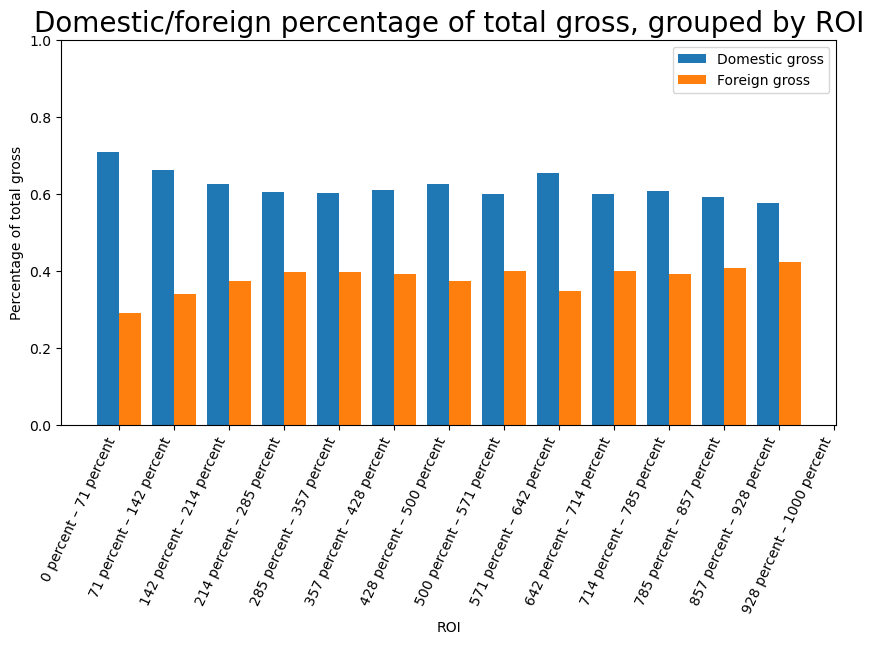

In [16]:
# Grouping the data by 'ROItier' and calculating mean percentages
grouped_df = budgets_df.groupby('ROItier').agg({
    'domestic_gross': lambda x: (x / budgets_df['worldwide_gross']).mean(),
    'foreign_gross': lambda x: (x / budgets_df['worldwide_gross']).mean()
}).reset_index()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 5))

x = grouped_df['ROItier']
domestic_percentage_means = grouped_df['domestic_gross']
foreign_percentage_means = grouped_df['foreign_gross']

x_axis = np.arange(len(x))
barplot1 = ax.bar(x_axis - 0.2, domestic_percentage_means, 0.4, label='Domestic gross')
barplot2 = ax.bar(x_axis + 0.2, foreign_percentage_means, 0.4, label='Foreign gross')

ax.set_xticks(x_axis)
ax.set_xticklabels(x, rotation=65, ha='right')
ax.set_xlabel("ROI")
ax.set_ylabel("Percentage of total gross")

ax.set_ylim(0, 1)

ax.legend(loc='upper right')
ax.set_title("Domestic/foreign percentage of total gross, grouped by ROI", fontsize=20)

plt.show()


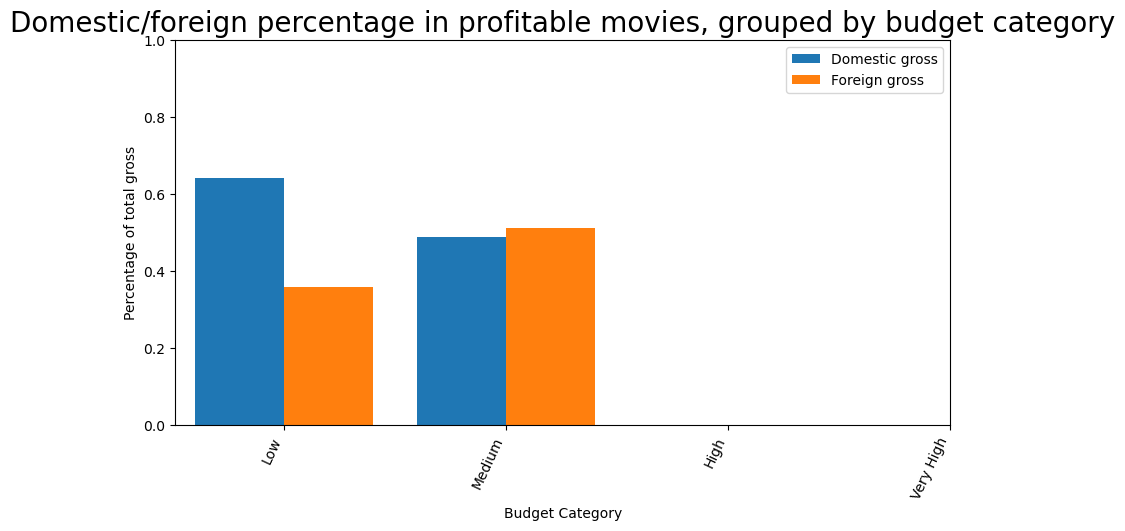

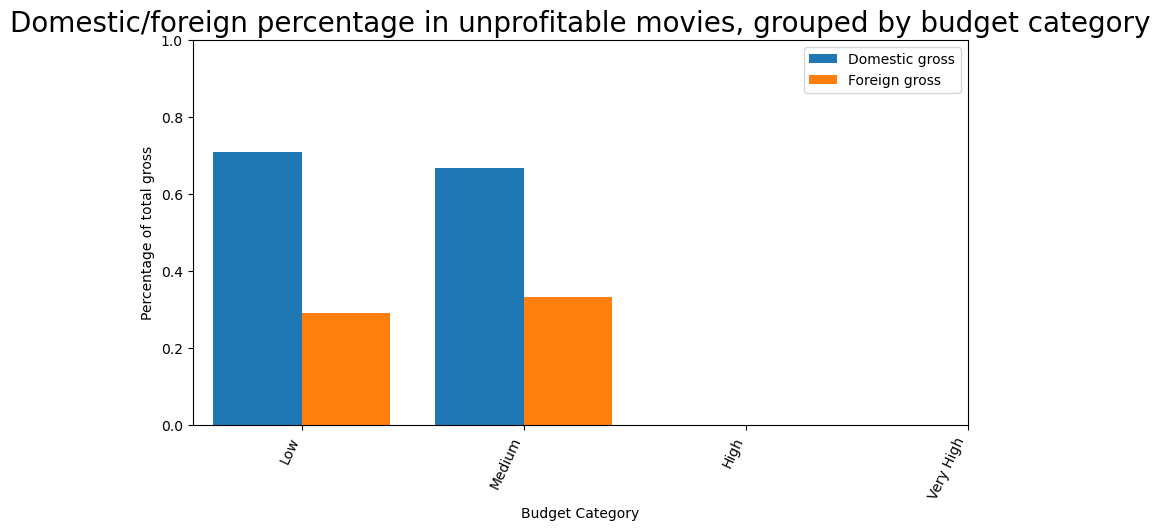

In [17]:
# Two datasets for use in the visualizations
unprofitable = budgets_df[budgets_df.profitable == False]  # All unprofitable movies
profitable = budgets_df[budgets_df.profitable == True]  # All profitable movies

datasets = [(profitable, 'profitable'), (unprofitable, 'unprofitable')]
tierranges = ['Low', 'Medium', 'High', 'Very High']

for dataset, label in datasets:
    fig, ax = plt.subplots(figsize=(10, 5))

    x = tierranges  # The clearly formatted string for all ROI tiers
    domestic_percentage_means = []  # Domestic gross percentage of total gross per ROI tier
    foreign_percentage_means = []  # Foreign gross percentage of total gross per ROI tier

    for i in x:
        df = dataset[dataset.budget_category == i]

        try:
            domestic_percentage = df['domestic_gross'] / df['worldwide_gross']
            foreign_percentage = df['foreign_gross'] / df['worldwide_gross']

            domestic_percentage_means.append(domestic_percentage.mean())
            foreign_percentage_means.append(foreign_percentage.mean())
        except (ZeroDivisionError, TypeError):
            # Handle division by zero error and TypeError
            continue

    x_axis = np.arange(len(x))
    barplot1 = ax.bar(x_axis - 0.2, domestic_percentage_means, 0.4, label='Domestic gross')
    barplot2 = ax.bar(x_axis + 0.2, foreign_percentage_means, 0.4, label='Foreign gross')

    ax.set_xticks(x_axis)
    ax.set_xticklabels(x, rotation=65, horizontalalignment='right')
    ax.set_xlabel("Budget Category")
    ax.set_ylabel("Percentage of total gross")

    ax.set_ylim(0, 1)

    ax.legend(loc='upper right')
    ax.set_title(f"Domestic/foreign percentage in {label} movies, grouped by budget category", fontsize=20)

plt.show()


**Budgets Recommendation**

Given the consistent pattern that appears across films of different levels of success, prioritizing advertising efforts should be focused on domestic channels. While it is important to highlight the role of domestic advertising, we must not ignore foreign advertising. Foreign advertising is often more prominent in more financially successful and lavishly budgeted films. It is critical to maintain a balanced strategy, generously funding both local and international advertising campaigns. This strategic suggestion is especially helpful for Microsoft since it encourages a careful distribution of resources, which is a good practice for any company that wants to get the most out of the ever-changing film marketing industry.

# Genre – Data Collecting & Cleaning


The `im.db` dataset provides the most comprehensive and valuable genre information. Budget and gross information, two crucial financial criteria, are missing, nevertheless. One strategic method combines data from many tables using well-structured joins to assess the genre's influence on ROI and profitability. Thanks to this connection, we can conduct more comprehensive research, delving into the correlation between genre dynamics and financial success KPIs in great detail. The complex link between genres and movie profitability or return on investment (ROI) may be better understood by integrating datasets that provide insights that connect genre-specific traits with financial performance metrics.

In [18]:
merged_df = pd.merge(budgets_df, movie_basics, left_on='movie', right_on='primary_title', how='inner')

# Select the desired columns
genredf = merged_df[['movie_id', 'date', 'genres', 'movie', 'budget', 'ROI', 'profitable']]

# Display the first row of the resulting dataframe
genredf.head(1)

,movie_id,date,genres,movie,budget,ROI,profitable
0,tt0359950,2013,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,91000000.0,206.44,True


Removing Duplicates

In [19]:
genredf.movie_id.value_counts().value_counts() #Checking for duplicates in the dataset

count
1    2902
2      84
Name: count, dtype: int64

In [20]:
genredf.movie_id.value_counts().head(2)

movie_id
tt1321509    2
tt4463894    2
Name: count, dtype: int64

In [21]:
# Remove duplicate entries in genredf based on 'movie_id'
genredf = genredf.drop_duplicates(subset='movie_id')

# Display the counts of unique counts of 'movie_id' to identify remaining duplicates
unique_counts = genredf.movie_id.value_counts().value_counts()
print(f"There are many duplicate entries: {unique_counts}")

There are many duplicate entries: count
1    2986
Name: count, dtype: int64


In [22]:
# Display the first two rows of 'movie_id' with duplicates to inspect conflicting data
genredf.movie_id.value_counts().head(2)

movie_id
tt0359950    1
tt2379653    1
Name: count, dtype: int64

In [23]:
# Display information for a specific 'movie_id' with conflicting data
genredf[genredf.movie_id == 'tt3555036']

,movie_id,date,genres,movie,budget,ROI,profitable
1035,tt3555036,1986,"Action,Drama",Legend,25000000.0,94.02,False


In [24]:
# Display information for another 'movie_id' with conflicting data
genredf[genredf.movie_id == 'tt2467046']

,movie_id,date,genres,movie,budget,ROI,profitable
1314,tt2467046,2001,"Action,Drama,Fantasy",Left Behind,18500000.0,22.82,False


The 'duplicate' entries are likely to contain conflicting data. It's clear we have to remove them

In [25]:
# Find the movie_ids that have at least two occurrences
duplicate_movie_ids = genredf[genredf.duplicated('movie_id', keep=False)]['movie_id'].unique()

# Filter genredf to include only rows where movie_id is not in duplicate_movie_ids
genredf = genredf[~genredf['movie_id'].isin(duplicate_movie_ids)].copy()

# Display the resulting dataframe
print(genredf)


       movie_id  date                    genres  \
0     tt0359950  2013    Adventure,Comedy,Drama   
1     tt1564021  1997       Documentary,History   
2     tt7332012  1997               Documentary   
3     tt2404435  2016  Action,Adventure,Western   
4     tt7368554  2005              Comedy,Drama   
...         ...   ...                       ...   
3065  tt3973612  2014                     Drama   
3066  tt6616538  1996                      None   
3067  tt1880418  2012              Comedy,Drama   
3068  tt7837402  2018    Horror,Sci-Fi,Thriller   
3069  tt2107644  2015     Drama,Horror,Thriller   

                                movie      budget     ROI  profitable  
0     The Secret Life of Walter Mitty  91000000.0  206.44        True  
1                             Contact  90000000.0  184.33        True  
2                             Contact  90000000.0  184.33        True  
3               The Magnificent Seven  90000000.0  180.58        True  
4                     The I

In [26]:
genredf.movie_id.value_counts().value_counts() # The duplicate entries are now gone

count
1    2986
Name: count, dtype: int64

**Genre and Profitability Correlation**

This section begins the analytical process by investigating the correlations between film success and various genres. To achieve this, a meticulous extraction of a comprehensive genre list from the dataset is undertaken. Subsequently, boolean columns are crafted for each genre, assigning values of `1 or 0` to denote their presence or absence in a given movie. These `boolean columns` are the foundation for constructing a correlation matrix, a crucial step in comprehending the nuanced relationships between different genres and success metrics. 

The matrix is then harnessed to generate an insightful heatmap using the seaborn package, offering a visual depiction of the robustness of correlations among genres. Notably, the focus on correlating with the boolean variable '`profitable`' is strategically chosen, given its binary nature that harmonizes well with categorical genres, steering clear of the intricate challenges associated with correlating continuous variables like Return on Investment (ROI) with genre categories.

In [27]:
genres = genredf['genres'].unique()
genres = [genre for genre in genres if genre is not None]
unique_genres = sorted(list(set(','.join(genres).split(','))))

unique_genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [29]:
genredf['genres'] = genredf['genres'].map(lambda x: 'None' if pd.isnull(x) else x)

**Creating boolean dataframe for genres**



In [30]:
genredf['genres'] = genredf['genres'].map(lambda x: 'None' if pd.isnull(x) else x)

# Creating a boolean DataFrame for genres
boolean_df = genredf['genres'].str.get_dummies(',').astype(bool)

boolean_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,None,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3066,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3067,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3068,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


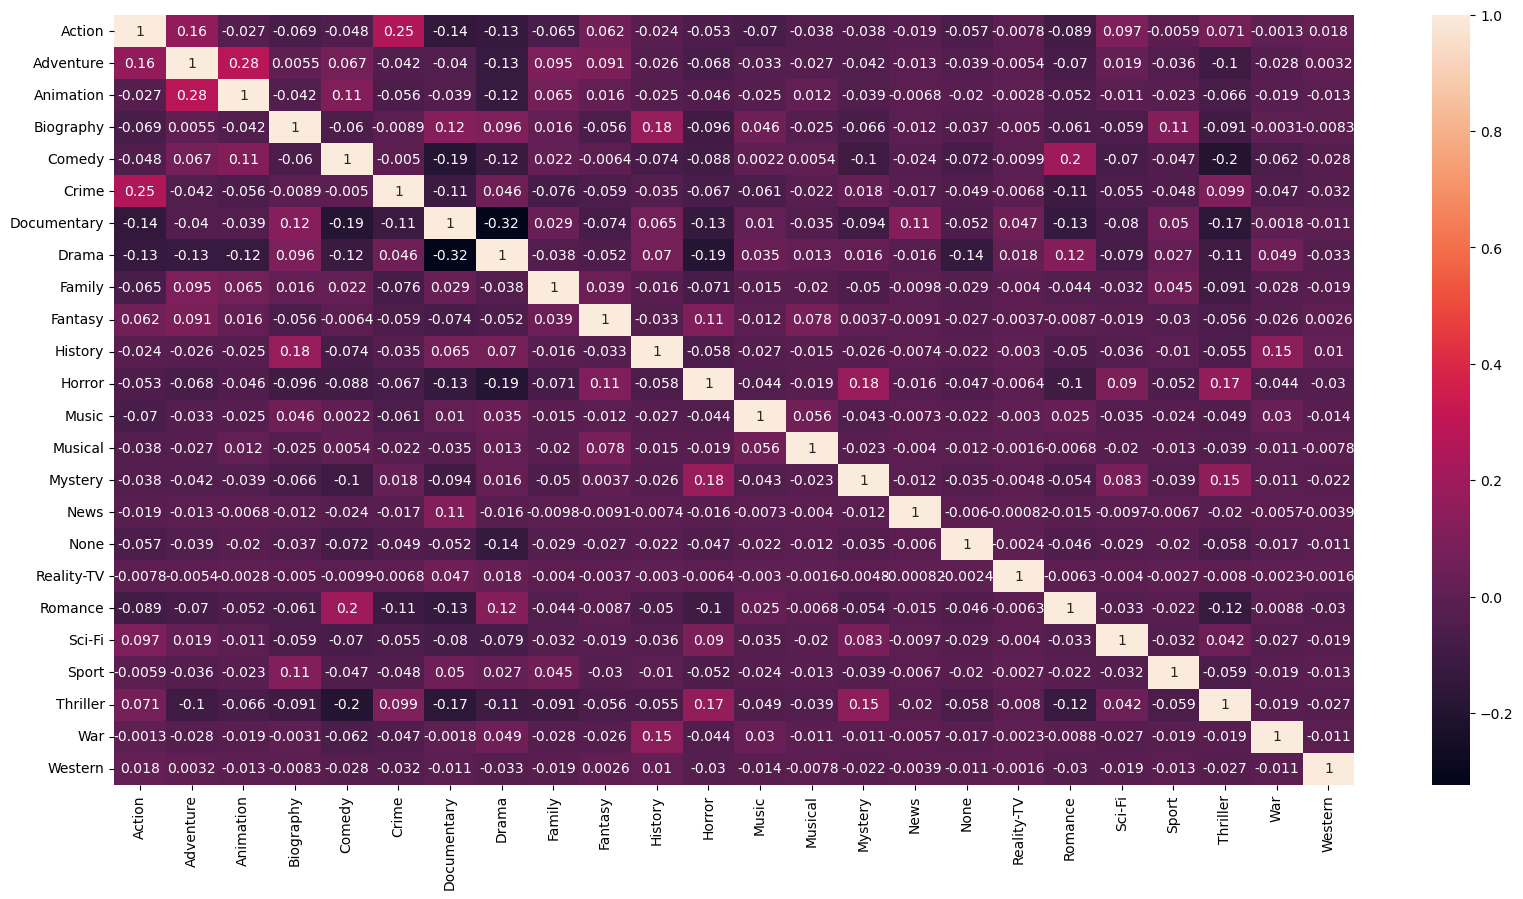

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(boolean_df.corr(), ax=ax, annot=True)

plt.show()

The correlations in the analysis are too weak to inform any recommendations